# IPL Match Prediction 

- Data set for train and test from 2008 to 2020

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [108]:
data = pd.read_csv('data/matches.csv')

In [109]:
df = data.copy()

In [110]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [111]:
cols = ['id','city','date','player_of_match','umpire1','umpire2','umpire3']
df = df.drop(cols, axis=1)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   season          636 non-null    int64 
 1   city            629 non-null    object
 2   team1           636 non-null    object
 3   team2           636 non-null    object
 4   toss_winner     636 non-null    object
 5   toss_decision   636 non-null    object
 6   result          636 non-null    object
 7   dl_applied      636 non-null    int64 
 8   winner          633 non-null    object
 9   win_by_runs     636 non-null    int64 
 10  win_by_wickets  636 non-null    int64 
 11  venue           636 non-null    object
dtypes: int64(4), object(8)
memory usage: 59.8+ KB


In [113]:
df.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000
mean,2012.490566,0.025157,13.682390,3.372642
std,2.773026,0.156726,23.908877,3.420338
min,2008.000000,0.000000,0.000000,0.000000
25%,2010.000000,0.000000,0.000000,0.000000
50%,2012.000000,0.000000,0.000000,4.000000
75%,2015.000000,0.000000,20.000000,7.000000
max,2017.000000,1.000000,146.000000,10.000000


In [114]:

df.isnull().sum()

season            0
city              7
team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
dl_applied        0
winner            3
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

In [115]:
df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [116]:
df.loc[df['team1'] == 'Delhi Daredevils', 'team1'] = 'Delhi Capitals'
df.loc[df['team1'] == 'Deccan Chargers', 'team1'] = 'Sunrisers Hyderabad'
df.loc[df['team2'] == 'Delhi Daredevils', 'team2'] = 'Delhi Capitals'
df.loc[df['team2'] == 'Deccan Chargers', 'team2'] = 'Sunrisers Hyderabad'
df.loc[df['winner'] == 'Delhi Daredevils', 'winner'] = 'Delhi Capitals'
df.loc[df['winner'] == 'Deccan Chargers', 'winner'] = 'Sunrisers Hyderabad'

In [117]:
def replace_name(name):
    if name == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if name == 'Deccan Chargers':
        return 'Sunrisers Hyderabad'
    else:
        return name

In [118]:
df['team1'] = df['team1'].apply(replace_name)
df['team2'] = df['team2'].apply(replace_name)
df['winner'] = df['winner'].apply(replace_name)

In [119]:
df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Logistic-Regression\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Logistic-Regression\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

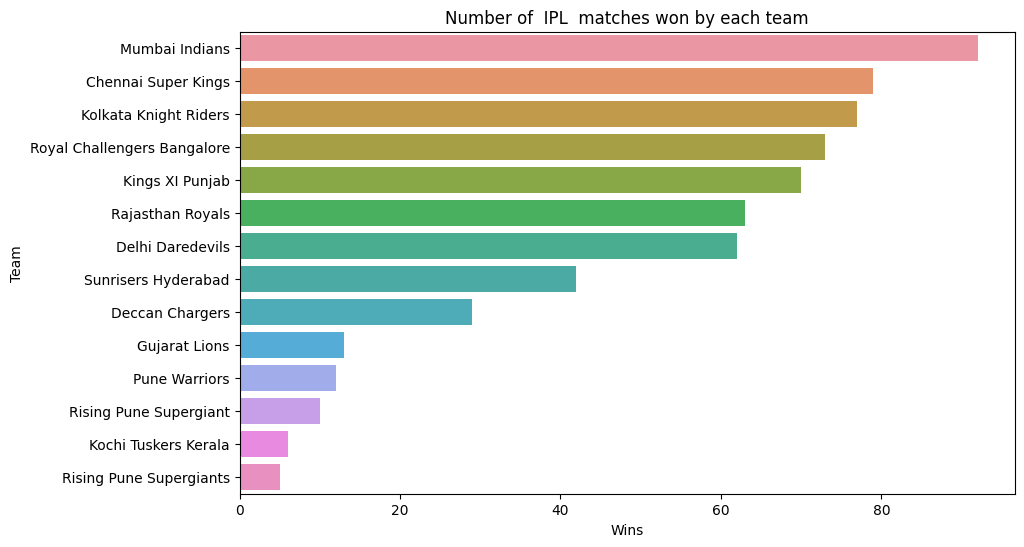

In [120]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = data,order= data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

plt.figure(figsize=(10, 6))
winner_counts = df['winner'].value_counts()
plt.barh(winner_counts.index, winner_counts.values)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of IPL matches won by each team')
plt.show()

c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Logistic-Regression\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Logistic-Regression\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Total Number of matches played in different stadium')

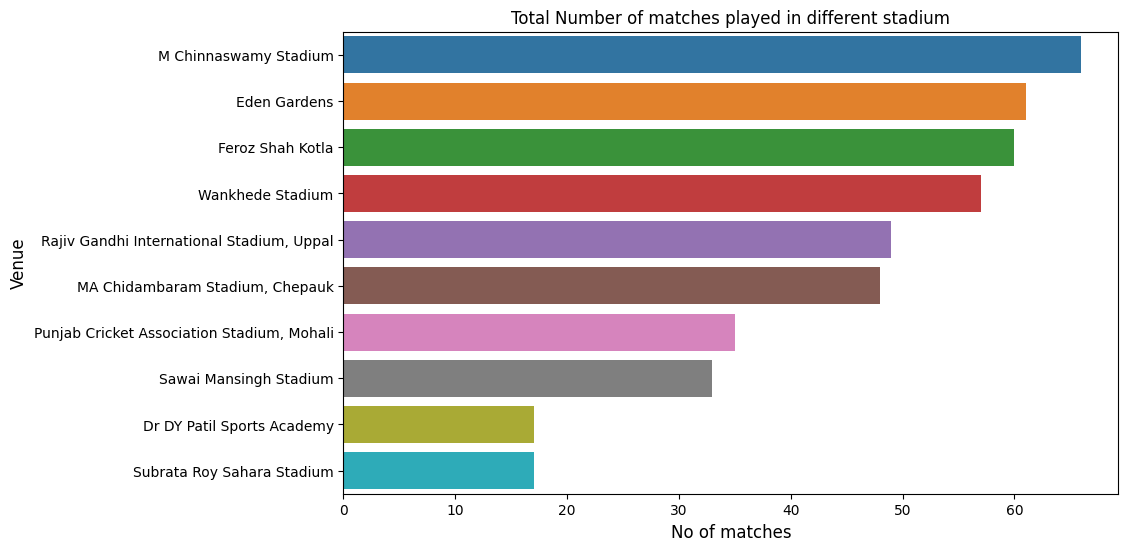

In [121]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = data,order = data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Logistic-Regression\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Logistic-Regression\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\MICRO\Downloads\JOML\ML Model Deployment\Data-Science-Diploma\Machine-Learning\Logistic-Regression\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.i

Text(0.5, 1.0, 'Toss Decision')

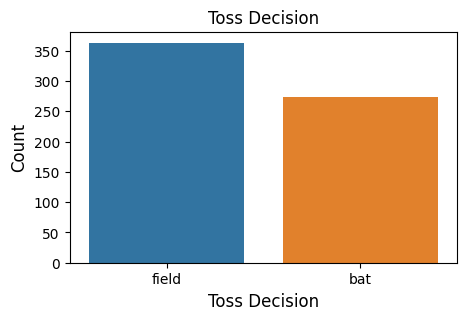

In [122]:
plt.figure(figsize = (5,3))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [123]:
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(df[i].unique())
  print(df[i].value_counts())

------------
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
city
Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: count

In [124]:
X = df.drop(['winner'],axis=1)
y = df['winner']

In [130]:
columns_to_encode = ["team1", "team2", "toss_winner", "toss_decision", "result"]
prefixes = ["team1", "team2", "toss_winner", "toss_decision", "result"]

X = pd.get_dummies(X, columns=columns_to_encode, prefix=prefixes, drop_first=True)


,season,city,dl_applied,win_by_runs,win_by_wickets,venue,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,...,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_normal,result_tie
0,2017,Hyderabad,0,35,0,"Rajiv Gandhi International Stadium, Uppal",False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1,2017,Pune,0,0,7,Maharashtra Cricket Association Stadium,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2,2017,Rajkot,0,0,10,Saurashtra Cricket Association Stadium,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
3,2017,Indore,0,0,6,Holkar Cricket Stadium,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,2017,Bangalore,0,15,0,M Chinnaswamy Stadium,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2016,Raipur,0,0,6,Shaheed Veer Narayan Singh International Stadium,True,False,False,False,...,False,False,False,False,False,True,False,True,True,False
632,2016,Bangalore,0,0,4,M Chinnaswamy Stadium,False,True,False,False,...,False,False,False,False,False,True,False,True,True,False
633,2016,Delhi,0,22,0,Feroz Shah Kotla,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
634,2016,Delhi,0,0,4,Feroz Shah Kotla,False,True,False,False,...,False,False,False,False,False,False,True,True,True,False
